## MNIST
Using the [MNIST](http://yann.lecun.com/exdb/mnist/) database, we'll train a model that can recognize handwritten digits.

In [ ]:
import torch
from torch.nn.modules.loss import CrossEntropyLoss
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Let's use the GPU
So you don't have to restart the runtime later in the notebook, let's tell Colab to use the GPU for hardware acceleration now.

Go to Runtime > Change Runtime Type and select GPU, then continue.

In [ ]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# learner view
# device = torch.device('what goes here?' if torch.cuda.is_available() else 'what_goes_here?')
print("Device: ", device)

Device:  cuda


In [ ]:
# hyperparameters
features = 784 # images are 28x28
# learner view
# features = what_goes_here? # images are 28x28
hidden_size = 100 # how many neurons to have in our hidden layer
num_labels = 10 # digits from 0-9
num_epochs = 10 
batch_size = 100
learning_rate = 0.001

# This data comes straight from PyTorch's Computer Vision library
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) # no need to shuffle the test set

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([100, 1, 28, 28]) torch.Size([100])


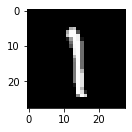

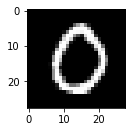

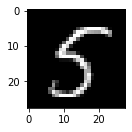

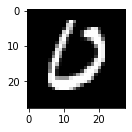

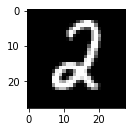

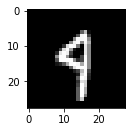

In [ ]:
# looking at the data
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
  plt.show()


In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, features, hidden_size, num_labels):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(features, hidden_size) # first layer
    # learner view
    # self.l1 = nn.Linear(what_goes_here?) # first layer

    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_labels) # hidden layer to output
    # learner view
    # self.l2 = nn.Linear(what_goes_here?) # hidden layer to output

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(features, hidden_size, num_labels).to(device)

In [ ]:
# loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device) # reshape turns the 28x28 squares into a single (1,784) vector
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = loss_function(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, batch {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
      if(i+1  == n_total_steps):
        print("epoch complete!")

epoch 1 / 10, batch 100/600, loss = 2.2896
epoch 1 / 10, batch 200/600, loss = 2.2804
epoch 1 / 10, batch 300/600, loss = 2.2677
epoch 1 / 10, batch 400/600, loss = 2.2319
epoch 1 / 10, batch 500/600, loss = 2.2199
epoch 1 / 10, batch 600/600, loss = 2.2042
epoch complete!
epoch 2 / 10, batch 100/600, loss = 2.1536
epoch 2 / 10, batch 200/600, loss = 2.1737
epoch 2 / 10, batch 300/600, loss = 2.1196
epoch 2 / 10, batch 400/600, loss = 2.0896
epoch 2 / 10, batch 500/600, loss = 2.0752
epoch 2 / 10, batch 600/600, loss = 2.0493
epoch complete!
epoch 3 / 10, batch 100/600, loss = 2.0203
epoch 3 / 10, batch 200/600, loss = 2.0032
epoch 3 / 10, batch 300/600, loss = 2.0351
epoch 3 / 10, batch 400/600, loss = 1.9401
epoch 3 / 10, batch 500/600, loss = 1.9281
epoch 3 / 10, batch 600/600, loss = 1.9187
epoch complete!
epoch 4 / 10, batch 100/600, loss = 1.8470
epoch 4 / 10, batch 200/600, loss = 1.8417
epoch 4 / 10, batch 300/600, loss = 1.7788
epoch 4 / 10, batch 400/600, loss = 1.7925
epoch 

In [ ]:
with torch.no_grad():
      n_correct = 0
      n_samples = 0
      for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images).to(device)
        _, predictions = torch.max(outputs, 1) # we don't need the first value returned by torch.max, so discard it via the _
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

      acc = 100.0 * n_correct / n_samples
      print(f'accuracy = {acc}')

accuracy = 82.9
